# Performance Analysis of GPU Copy Functions

## Introduction

In this notebook, we analyze the performance of GPU copy functions using shared and non-shared memory for different numbers of threads per block. We will plot the time elapsed for these operations against the number of elements processed.

In [5]:
import matplotlib.pyplot as plt
import mygputest.shuffle_copy as shuffle_copy

## Results

The following plot shows the relationship between the time elapsed and the number of elements processed for both shared and non-shared memory scenarios with different numbers of threads per block.

In [8]:
# Initialize variables
num_treads_per_block_512 = 512
num_treads_per_block_256 = 256
time_elapsed_noshared_512 = []
time_elapsed_shared_512 = []
time_elapsed_noshared_256 = []
time_elapsed_shared_256 = []
num_elements_list_512 = []
num_elements_list_256 = []

# Collect data for num_treads_per_block = 512
min_num=10
for i in range(0, 30):
    num_blocks = min_num + i*300
    numElements = num_blocks * num_treads_per_block_512
    num_elements_list_512.append(numElements)
    time_elapsed_noshared_512.append(shuffle_copy.test_copy_allkinds(num_treads_per_block_512, numElements, False, True))
    time_elapsed_shared_512.append(shuffle_copy.test_copy_allkinds(num_treads_per_block_512, numElements, True, True))

# Collect data for num_treads_per_block = 256
for i in range(0, 30):
    num_blocks = 2*(min_num + i*300)

    numElements = num_blocks * num_treads_per_block_256
    num_elements_list_256.append(numElements)
    time_elapsed_noshared_256.append(shuffle_copy.test_copy_allkinds(num_treads_per_block_256, numElements, False, True))
    time_elapsed_shared_256.append(shuffle_copy.test_copy_allkinds(num_treads_per_block_256, numElements, True, True))


## Results

The following plot shows the relationship between the time elapsed and the number of elements processed for both shared and non-shared memory scenarios with different numbers of threads per block.

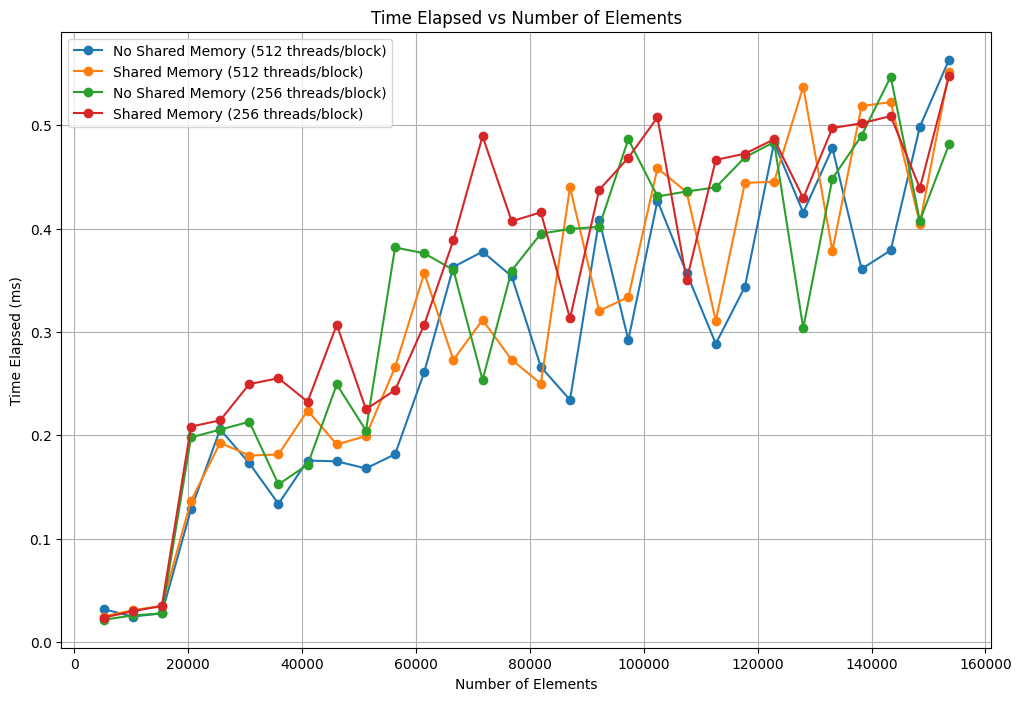

In [7]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot time_elapsed_noshared for 512 threads per block
plt.plot(num_elements_list_512, time_elapsed_noshared_512, label='No Shared Memory (512 threads/block)', marker='o')

# Plot time_elapsed_shared for 512 threads per block
plt.plot(num_elements_list_512, time_elapsed_shared_512, label='Shared Memory (512 threads/block)', marker='o')

# Plot time_elapsed_noshared for 256 threads per block
plt.plot(num_elements_list_256, time_elapsed_noshared_256, label='No Shared Memory (256 threads/block)', marker='o')

# Plot time_elapsed_shared for 256 threads per block
plt.plot(num_elements_list_256, time_elapsed_shared_256, label='Shared Memory (256 threads/block)', marker='o')

# Adding titles and labels
plt.title('Time Elapsed vs Number of Elements')
plt.xlabel('Number of Elements')
plt.ylabel('Time Elapsed (ms)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

*Figure 1: Time elapsed for GPU copy functions with and without shared memory for different numbers of threads per block.*